#Εργασία 1η - Επιβλεπόμενη Μάθηση
## Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα


Datasets: 

1.   U13 - EEG Eye State
2.   K07 - Dry Bean Dataset



# **Μέρος Πρώτο**


## **Εισαγωγή και Προεπισκόπηση**

<ul>
<li>Το συγκεκριμένο dataset συγκεντρώνει τις παρατηρήσεις από μια μέτρηση EEG για χρονικό διάστημα 117secs. Συγκεκριμένα αυτή η μέτρηση αφορά στην καταγραφή της "ηλεκτρικής" δραστηριότητας του εγκεφάλου ανά διαφορετικές ομάδες νευρώνων. Κατά τη διάρκεια της μέτρησης μια κάμερα κατέγραφε πότε τα μάτια ήταν ανοικτά ή κλειστά. Η κατάσταση ανοικτού/κλειστού ματιού στη συνέχεια καταγράφηκε χειροκίνητα σε κάθε χρονικό βήμα. Συνολικά έγιναν 14.980 καταγραφές με 15 χαρακτηριστικά, με τα 14 να αφορούν τις τιμές των ηλεκτροδίων και 1 την κατάσταση των ματιών. Σκοπός είναι να φτιαχθεί ένα μοντέλο που να μπορεί να προβλέψει εάν τα μάτια είναι ανοιχτά ή κλειστά βάσει αυτών των τιμών.</li>
<br>
<li>
Δεν χρειάζεται να κάνουμε κάποια αλλαγή στο αρχείο αφού μπορούμε να το ανοίξουμε κανονικά χρησιμοποιώντας τη βιβλιοθήκη scipi.io όπως φαίνεται και παρακάτω.
</li>
</ul>

Ανάγνωση αρχείου .arff

In [ ]:
from scipy.io import arff
import pandas as pd
import seaborn as sns
data = arff.loadarff('EEG Eye State.arff')
df = pd.DataFrame(data[0])
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


<ul>
<li>Παρακάτω δίνουμε τον συνολικό αριθμό δειγμάτων (df.shape[0]).</li>
<br>
<li>Ο αριθμός και το είδος των χαρακτηριστικών (δραστηριότητα στις ομάδες νευρώνων στον εγκέφαλο) περιγράφονται από τις στήλες του dataframe εξαιρώντας την στήλη που περιγράφει αν το μάτι είναι ανοικτό ή κλειστό.</li>
</ul>

In [ ]:
print("Total number of elements :",df.shape[0])
detect=df.columns.tolist()
detect.pop()
print("Number of attributes :",len(detect))
print("Attributes are :",detect)

Total number of elements : 14980
Number of attributes : 14
Attributes are : ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']


<ul>
<li>Παρατηρούμε πως εμφανίζεται κανονικά αρίθμηση γραμμών στο dataframe ωστόσο δεν μπορούμε να γνωρίζουμε αν υπήρχε και αρχικά στο .arff αρχείο. Ανοίγοντας στο Atom το αρχείο μπορούμε να δούμε πως στον αρχικό τύπο αρχείου δεν εμφανίζεται κάποια αρίθμηση γραμμών.</li>
<br>
<li>Οι ετικέτες των κλάσεων μπορούν να εντοπιστούν στη στήλη eyeDetection. Τα δεδομένα της συγκεκριμένης στήλης υποδεικνύουν το κατά πόσο το μάτι είναι ανοικτό (0) ή κατά πόσο είναι κλειστό (1).</li>
<br>
<li>Παρατηρούμε όπως φαίνεται και παρακάτω πως δεν υπάρχουν απουσιάζουσες τιμές σε κάποιο δείγμα.</li>
<ul>

<ul>
<li>Το πλήθος των κλάσεων είναι δύο η κλάση 0 εμφανίζεται στο dataset με ποσοστό 55.12 % και η κλάση 1 εμφανίζεται με ποσοστό 44.88 %. Συνέπως παρατηρούμε πως το dataset είναι ισορροπημένο.</li>
</ul>

In [ ]:
print("Check whether we can find NaN values :",df.isnull().values.any())

Check whether we can find NaN values : False


In [ ]:
labels = df["eyeDetection"]
labels = pd.to_numeric(labels)
vals = labels.value_counts()

In [ ]:
print("Percentage of class 0 : {:.2f} %".format((vals[0]/vals.sum())*100))
print("Percentage of class 1 : {:.2f} %".format((vals[1]/vals.sum())*100))

Percentage of class 0 : 55.12 %
Percentage of class 1 : 44.88 %


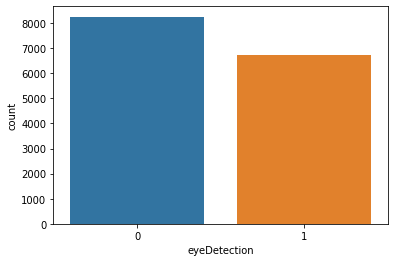

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=FutureWarning)
  sns.countplot(labels)

## **Προετοιμασία**

<ul>
<li>
Εφόσον το σύνολο δεδομένων που επεξεργαζόμαστε διαθέτει 
μονάχα αριθμητικά (numerical) δεδομένα, και μάλιστα είναι πλήρες (χωρίς απουσιάζουσες τιμές), το μόνο που μας απομένει να κάνουμε, πρωτού ξεκινήσουμε την διαδικασία εκπαίδευσης και αποτίμησης των αλγορίθμων μάθησης, είναι ο διαχωρισμός τους σε 2 υποσύνολα: 
 

*   Τraining (70%)
*   Τesting (30%)
</li>
</ul>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score, KFold
y = labels
X = df.drop(columns="eyeDetection")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle = True, random_state=42)
print('Shape of X_train: {0}, y_train: {1}'.format(X_train.shape,y_train.shape))
print('Shape of X_test: {0}, y_test: {1}'.format(X_test.shape,y_test.shape))

Shape of X_train: (10486, 14), y_train: (10486,)
Shape of X_test: (4494, 14), y_test: (4494,)


## **Ταξινομητές**

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
import time 

def train_evaluate(model,xtrain,ytrain,xtest,ytest,kfold=None):
  """
    Function that fits the model to the training data and then
    calculates the following:
      - Accuracy of the model
      - F1 metric
      - Cross Score Accuracy and F1 mean values
    It also returns the time needed to fit and test the model
  """
  model_st = time.time()
  model.fit(xtrain,ytrain)
  model_fin = time.time()
  fit_time = model_fin - model_st
  print('Training Time: {:.6f} sec'.format(fit_time))

  test_st = time.time()
  predictions = model.predict(xtest)
  test_fin = time.time()
  test_time = test_fin - test_st
  print('Testing Time: {:.6f} sec'.format(test_time))

  f1 = 'macro'

  values=[]
  values.append(accuracy_score(ytest,predictions))
  values.append(f1_score(ytest,predictions,average=f1))
  print("Testing Accuracy: {0:.4f} % \nTesting F1 score: {1:.4f} %".format(values[0],values[1]))

  if kfold is not  None:
    kf = KFold(n_splits=kfold,random_state=42,shuffle=True)
    values.append(cross_val_score(model,xtrain,ytrain,cv=kf,scoring="accuracy").mean())
    values.append(cross_val_score(model,xtrain,ytrain,cv=kf,scoring="f1_macro").mean())
    print("Cross Validation Accuracy: {0:.4f} % \nCross Validation F1 score: {1:.4f} %".format(values[2],
                                                                          values[3]))
  values.append(fit_time)
  values.append(test_time)

  return values

### **Dummy** 

In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
print("Results of Default/Prior Dummy Classifier")
dummy_eval = train_evaluate(dummy,X_train,y_train,X_test,y_test,kfold=10)

Results of Default/Prior Dummy Classifier
Training Time: 0.000797 sec
Testing Time: 0.000181 sec
Testing Accuracy: 0.5309 % 
Testing F1 score: 0.3468 %
Cross Validation Accuracy: 0.5599 % 
Cross Validation F1 score: 0.3589 %


### **Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
print("Results of Gaussian Naive Bayes")
gnb_eval = train_evaluate(gnb,X_train,y_train,X_test,y_test,kfold=10)

Results of Gaussian Naive Bayes
Training Time: 0.006678 sec
Testing Time: 0.002777 sec
Testing Accuracy: 0.4682 % 
Testing F1 score: 0.3527 %
Cross Validation Accuracy: 0.4558 % 
Cross Validation F1 score: 0.3482 %


### **K - Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print("Results for Nearest Neighbor Classifier with default values")
knn = KNeighborsClassifier()
knn_eval = train_evaluate(knn,X_train,y_train,X_test,y_test,kfold=10)

Results for Nearest Neighbor Classifier with default values
Training Time: 0.020882 sec
Testing Time: 0.351516 sec
Testing Accuracy: 0.9646 % 
Testing F1 score: 0.9645 %
Cross Validation Accuracy: 0.9569 % 
Cross Validation F1 score: 0.9562 %


### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter = 1000,random_state=42)
print("Results of Logistic Regression Classifier")
logistic_eval = train_evaluate(logisticRegr,X_train,y_train,X_test,y_test,kfold=10)

Results of Logistic Regression Classifier
Training Time: 0.692821 sec
Testing Time: 0.001846 sec
Testing Accuracy: 0.6306 % 
Testing F1 score: 0.6137 %
Cross Validation Accuracy: 0.6464 % 
Cross Validation F1 score: 0.6232 %


### *Σχόλια*

* Παρατηρούμε πως στον ταξινομητή Dummy, το μοντέλο ακολουθώντας την prior στρατηγική (επιλέγει πάντα την κλάση η οποία εμφανίζεται πιό συχνά στο σύνολο y_train), επιτυγχάνει πολύ χαμηλό f1 score (0.35), ενώ η ακρίβεια δεν είναι ιδιαίτερα μεγάλη και βρίσκεται κοντά στο 0.5 όπως είναι αναμενόμενο απ' τον συγκεκριμένο ταξινομητή.

* Ο ταξινομητής Gaussian Naive Bayes παρατηρούμε πως επιστρέφει f1 score ίσο με 0.55 και ακρίβεια ίση με 0.46. Αυτό είναι λογικό αφού ο συγκεκριμένος ταξινομητής δεν δίνει σημασία στην εξάρτηση μεταξύ των features, τα οποία θεωρεί πως είναι στατιστικά ανεξάρτητα μεταξύ τους, κάτι το οποίο προφανώς και δεν ισχύει στην πραγματικότητα.

* Ο ταξινομητής kNN (με default παράμετρο k = 5 γειτόνες) επιστρέφει τις μεγαλύτερες τιμές f1 score και accuracy σ' αυτό το μέρος της εργασίας. Ειδικότερα το f1 score που επιστρέφει είναι ίσο με 0.95 ενώ η ακρίβεια του είναι 0.96. Αν και δεν έχει γίνει κάποια βελτιστοποιήση ακόμα, η πολύ καλή απόδοση που παρουσιάζει ο συγκεκριμένος αλγόριθμος μπορεί να οφείλεται στην κοντινή "απόσταση" (στον διανυσματικό χώρο) που έχουν μεταξύ τους πρότυπα της ίδιας κλάσης.

* Ο ταξινομητής logistic regression παρατηρούμε πως επιστρέφει καλύτερες τιμές από τον Gaussian Naive Bayes, όμως έχει χειρότερη απόδοση συγκριτικά με τον Nearest Neighbors. Αυτό θα μπορούσε να είναι μια συνέπεια του ότι τα δεδομένα μας σε μεγάλο βαθμό, δεν είναι γραμμικά διαχωρίσιμα

Τα αποτελέσματα των παραπάνω ταξινομητών, με τις default τιμές τους, μπορούμε να τα δούμε και στον παρακάτω πίνακα (και στο bar plot που ακολουθεί)

In [ ]:
classifier = ['Dummy','Gaussian Naive Bayes','KNN','Logistic Regression']
accs = [100*dummy_eval[0],100*gnb_eval[0],100*knn_eval[0],100*logistic_eval[0]]
f1_scores = [100*dummy_eval[1],100*gnb_eval[1],100*knn_eval[1],100*logistic_eval[1]]
cross_acc = [100*dummy_eval[2],100*gnb_eval[2],100*knn_eval[2],100*logistic_eval[2]]
cross_f1= [100*dummy_eval[3],100*gnb_eval[3],100*knn_eval[3],100*logistic_eval[3]]
d = list(zip(classifier,accs,f1_scores,cross_acc,cross_f1))

results = pd.DataFrame(d,columns = ['Classifier','Accuracy (%)','F1 Macro (%)',
                            'Cross Validation Accuracy (%)','Cross Validation F1 (%)'],).set_index('Classifier')
results = results.style.format("{:.3f}")
results = results.set_properties(**{'width':'100px','text-align': 'center'})
results

,Accuracy (%),F1 Macro (%),Cross Validation Accuracy (%),Cross Validation F1 (%)
Classifier,,,,
Dummy,53.093,34.680,55.989,35.888
Gaussian Naive Bayes,46.818,35.272,45.584,34.822
KNN,96.462,96.446,95.689,95.616
Logistic Regression,63.062,61.372,64.639,62.324


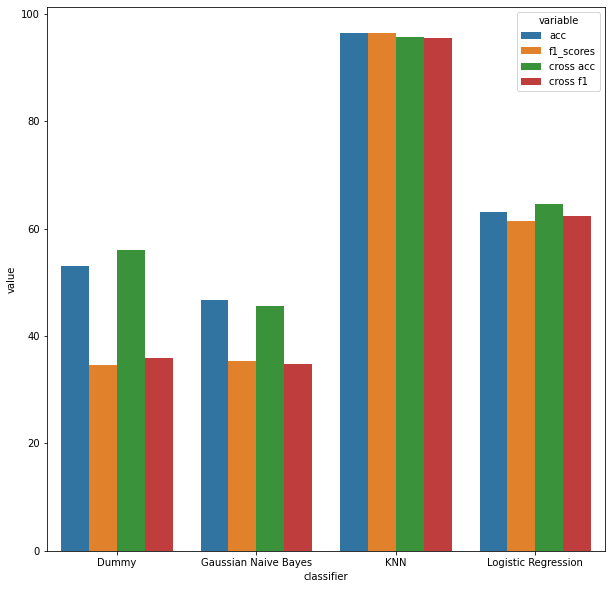

In [ ]:
import matplotlib.pyplot as plt

data2 = pd.DataFrame()
data2['classifier'] = classifier
data2['acc'] = accs
data2['f1_scores'] = f1_scores
data2['cross acc'] = cross_acc
data2['cross f1'] = cross_f1

data2 = pd.melt(data2, id_vars =['classifier'], value_vars =['acc', 'f1_scores','cross acc','cross f1'])
plt.figure(figsize=(10,10))
sns.barplot(x='classifier', y='value', hue='variable', data=data2)
plt.show()

## **Βελτιστοποιήση**

In [ ]:
from tqdm import tqdm
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler,QuantileTransformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.model_selection import GridSearchCV

In [ ]:
train_variance = X_train.var(axis=0)
print(train_variance)
vthreshold = [50,100, 200, 300] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [3,6,8,10,12]

AF3    8.869583e+06
F7     1.265540e+03
F3     1.424348e+03
FC5    3.887217e+07
T7     8.470848e+02
P7     1.539107e+03
O1     3.024005e+07
O2     3.708536e+02
P8     6.519405e+06
T8     9.659094e+02
FC6    1.622770e+03
F4     1.458111e+03
F8     2.081724e+06
AF4    1.299520e+06
dtype: float64


### **Dummy**

Η απόδοση του dummy ταξινομητή, εξαρτάται μονάχα από το πλήθος των δεδομένων της κάθε κλάσης, οπότε οι περισσότερες τεχνικές προεπεξεργασίας δεδομένων δεν θα προκαλέσουν κάποια σημαντική διαφορά στην συμπεριφορά του. Για τον λόγο αυτό, η μόνη υπερ-παράμετρος που μας ενδιαφέρει να αναζητήσουμε, είναι η στρατηγική που θα ακολουθήσει ο ταξινομητής, για να κάνει πρόβλεψη των δειγμάτων. 

In [ ]:
clf = DummyClassifier()
strat = ['uniform','most_frequent','stratified','constant']
con = [0,1]
pipe_dc = Pipeline(steps=[('dummy',clf)])
print("Results of Dummy Classifier - Accuracy Optimization")

dummy_estimator = GridSearchCV(pipe_dc, dict(dummy__strategy=strat,dummy__constant=con),
                         cv=10, scoring='accuracy', n_jobs=-1)
dummy_acc = train_evaluate(dummy_estimator,X_train,y_train,X_test,y_test)

Results of Dummy Classifier - Accuracy Optimization
Training Time: 2.103058 sec
Testing Time: 0.000308 sec
Testing Accuracy: 0.5309 % 
Testing F1 score: 0.3468 %


In [ ]:
print(dummy_estimator.best_estimator_)
print('Parameters for best dummy (accuracy optimization) are:', dummy_estimator.best_params_)
time_best_dummy_fit = dummy_estimator.refit_time_
time_best_dummy_st= time.time()
dummy_estimator.predict(X_test)
time_best_dummy_fin = time.time()
time_best_dummy_test = time_best_dummy_fin - time_best_dummy_st
print("Time to refit best model: {:.6f} sec".format(time_best_dummy_fit))
print("Time to test best model: {:.6f} sec".format(time_best_dummy_test))
print('Mean cross-validated accuracy score of the best estimator: {:.4f} %'.format(dummy_estimator.best_score_))

Pipeline(steps=[('dummy',
                 DummyClassifier(constant=0, strategy='most_frequent'))])
Parameters for best dummy (accuracy optimization) are: {'dummy__constant': 0, 'dummy__strategy': 'most_frequent'}
Time to refit best model: 0.001251 sec
Time to test best model: 0.000541 sec
Mean cross-validated accuracy score of the best estimator: 0.5599 %


In [ ]:
clf = DummyClassifier()
strat = ['uniform','most_frequent','stratified','constant']
con = [0,1]
pipe_dc = Pipeline(steps=[('dummy',clf)])
print("Results of Dummy Classifier - F1 Score Optimization")

dummy_estimator1 = GridSearchCV(pipe_dc, dict(dummy__strategy=strat,dummy__constant=con),
                         cv=10, scoring='f1', n_jobs=-1)
dummy_f1 = train_evaluate(dummy_estimator1,X_train,y_train,X_test,y_test)

Results of Dummy Classifier - F1 Score Optimization
Training Time: 0.586648 sec
Testing Time: 0.000245 sec
Testing Accuracy: 0.4691 % 
Testing F1 score: 0.3193 %


In [ ]:
print(dummy_estimator1.best_estimator_)
print('Parameters for best dummy (f1 optimization) are:', dummy_estimator1.best_params_)
time_best_dummy1_fit = dummy_estimator1.refit_time_
time_best_dummy1_st= time.time()
dummy_estimator1.predict(X_test)
time_best_dummy1_fin = time.time()
time_best_dummy1_test = time_best_dummy1_fin - time_best_dummy1_st
print("Time to refit best model: {:.6f} sec".format(time_best_dummy1_fit))
print("Time to test best model: {:.6f} sec".format(time_best_dummy1_test))
print('Mean cross-validated f1 score of the best estimator: {:.4f} %'.format(dummy_estimator1.best_score_))

Pipeline(steps=[('dummy', DummyClassifier(constant=1, strategy='constant'))])
Parameters for best dummy (f1 optimization) are: {'dummy__constant': 1, 'dummy__strategy': 'constant'}
Time to refit best model: 0.000852 sec
Time to test best model: 0.000369 sec
Mean cross-validated f1 score of the best estimator: 0.6112 %


In [ ]:
time_dummy_fit = (time_best_dummy_fit+time_best_dummy1_fit)/2
time_dummy_test = (time_best_dummy_test+time_best_dummy1_test)/2 

### **Gaussian Naive Bayes**

Για τον Gaussian Naive Bayes, έπειτα από αρκετές δοκιμές σε συνδυασμούς των βημάτων προεπεξεργασίας, καταλήξαμε στο ότι:

*   Αρχικά, εφαρμόζουμε PCA, ώστε να μειώσουμε τις διαστάσεις των δεδομένων μας (ο αλγόριθμος εντοπίζει τις κατευθύνσεις στις οποίες μεγιστοποιείται η διακύμανση των 14 features)

*   Έπειτα, με την χρήση της συνάρτησης VarianceThreshold, θα κρατήσουμε μονάχα τα χαρακτηριστικά, των οποίων η διακύμανση (variance) ξεπερνά μία συγκεκριμένη τιμή.

*   Τέλος, θα κανονικοποιήσουμε τα δεδομένα, ώστε να περιορίσουμε το εύρος των τιμών τους. Μέτα από δοκιμές, επιλέψαμε τον Normalizer έναντι του StandardScaler και της MinMaxScaler συνάρτησης της Sklearn.


Τις a-priori πιθανότητες των 2 κλάσεων δε τις θέτουμε εμείς, αλλά θα μεταβάλλονται δυναμικά, ανάλογα με το πλήθος των δειγμάτων σε κάθε μία από αυτές στο training set.

In [ ]:
clf = GaussianNB()
selector = VarianceThreshold()
scaler =  Normalizer()
pca = PCA()
pipe_gnb1 = Pipeline(steps=[('pca',pca),('selector',selector),('scaler',scaler),('gaussian',clf)])
print("Results of Naive Bayes Classifier")
gnb_estimator = GridSearchCV(pipe_gnb1, dict(selector__threshold=vthreshold, 
                                    pca__n_components=n_components), cv=10, scoring='accuracy', n_jobs=-1)
gnb_acc = train_evaluate(gnb_estimator,X_train,y_train,X_test,y_test)

Results of Naive Bayes Classifier
Training Time: 4.748671 sec
Testing Time: 0.005061 sec
Testing Accuracy: 0.6041 % 
Testing F1 score: 0.5847 %


In [ ]:
print(gnb_estimator.best_estimator_)
print('Parameters for best GNB (accuracy optimization) are:', gnb_estimator.best_params_)
time_best_gnb_fit = gnb_estimator.refit_time_
time_best_gnb_st= time.time()
gnb_estimator.predict(X_test)
time_best_gnb_fin = time.time()
time_best_gnb_test = time_best_gnb_fin - time_best_gnb_st
print("Time to refit best model: {:.6f} sec".format(time_best_gnb_fit))
print("Time to test best model: {:.6f} sec".format(time_best_gnb_test))
print('Mean cross-validated accuracy score of the best estimator: {:.4f} %'.format(gnb_estimator.best_score_))

Pipeline(steps=[('pca', PCA(n_components=8)),
                ('selector', VarianceThreshold(threshold=100)),
                ('scaler', Normalizer()), ('gaussian', GaussianNB())])
Parameters for best GNB (accuracy optimization) are: {'pca__n_components': 8, 'selector__threshold': 100}
Time to refit best model: 0.039650 sec
Time to test best model: 0.005040 sec
Mean cross-validated accuracy score of the best estimator: 0.6340 %


In [ ]:
clf = GaussianNB()
selector = VarianceThreshold()
scaler =  Normalizer()
pca = PCA()
pipe_gnb2 = Pipeline(steps=[('pca',pca),('selector',selector),('scaler',scaler),('gaussian',clf)])
print("Results of Naive Bayes Classifier")
gnb_estimator1 = GridSearchCV(pipe_gnb2, dict(selector__threshold=vthreshold, 
                                    pca__n_components=n_components), cv=10, scoring='f1', n_jobs=-1)
gnb_f1 = train_evaluate(gnb_estimator1,X_train,y_train,X_test,y_test)

Results of Naive Bayes Classifier
Training Time: 4.880922 sec
Testing Time: 0.004557 sec
Testing Accuracy: 0.6041 % 
Testing F1 score: 0.5847 %


In [ ]:
print(gnb_estimator1.best_estimator_)
print('Parameters for best GNB (f1 optimization) are:', gnb_estimator1.best_params_)
time_best_gnb1_fit = gnb_estimator1.refit_time_
time_best_gnb1_st= time.time()
gnb_estimator1.predict(X_test)
time_best_gnb1_fin = time.time()
time_best_gnb1_test = time_best_gnb1_fin - time_best_gnb1_st
print("Time to refit best model: {:.6f} sec".format(time_best_gnb1_fit))
print("Time to test best model: {:.6f} sec".format(time_best_gnb1_test))
print('Mean cross-validated accuracy score of the best estimator: {:.4f} %'.format(gnb_estimator1.best_score_))

Pipeline(steps=[('pca', PCA(n_components=8)),
                ('selector', VarianceThreshold(threshold=100)),
                ('scaler', Normalizer()), ('gaussian', GaussianNB())])
Parameters for best GNB (f1 optimization) are: {'pca__n_components': 8, 'selector__threshold': 100}
Time to refit best model: 0.035318 sec
Time to test best model: 0.005498 sec
Mean cross-validated accuracy score of the best estimator: 0.5150 %


In [ ]:
time_gnb_fit = (time_best_gnb_fit+time_best_gnb1_fit)/2
time_gnb_test = (time_best_gnb_test+time_best_gnb1_test)/2 

### **K - Nearest Neighbors**

Ο αλγόριθμος των κοντινότερων γειτόνων, όπως είδαμε και στην out-of-the-box εκτέλεση, εξήγαγε εξαιρετικά αποτελέσματα. 

*   Για το πρόβλημα μας, παρατηρήσαμε ότι η προεπεξεργασία των δεδομένων, μέσω εφαρμογής κάποιου κατώφλίου ή του αλγορίθμου PCA (που μειώνουν τις διαστάσεις των δεδομένων), ήταν επιζήμιες για την απόδοση του.

*   Παρόμοια συμπεριφορά είχε το μοντέλο (μειωμένη απόδοση), όταν για την κανονικοποίηση των τιμών, χρησιμοποιούσαμε τις συναρτήσεις StandardScaler και  MinMaxScaler. Αντιθέτως, ο Normalizer, βοηθούσε το μοντέλο μας στο να πετύχει ελάχιστα καλύτερες τιμές στο accuracy και το f1 score.

Η μοναδική υπερ-παράμετρος που θα αναζητήσουμε με την συνάρτηση GridSearchCV, είναι ο αριθμός των κοντινότερων γειτόνων k (ο αριθμός k θα πρέπει να είναι περιττός, ειδικά στην περίπτωση της δυϊκής ταξινόμησης, για να αποφύσουμε τυχόν "ισοπαλίες"). Έπειτα, από ορισμένες δοκιμές, παρατηρούμε ότι καθώς αυξάνεται ο αριθμός k, μειώνεται και η απόδοση του αλγορίθμο στην πρόβλεψη των κλάσεων.  






In [ ]:
clf = KNeighborsClassifier(n_jobs=-1)
scaler = Normalizer()
kneigh = [1,3,5,9,15]
print("Results of KNN Classifier")
pipe_kNN1 = Pipeline(steps=[('scaler',scaler),('kNN',clf)])
kNN_estimator = GridSearchCV(pipe_kNN1,dict(kNN__n_neighbors=kneigh),cv=10, scoring='accuracy', n_jobs=-1)
kNN_acc = train_evaluate(kNN_estimator,X_train,y_train,X_test,y_test)

Results of KNN Classifier
Training Time: 9.561872 sec
Testing Time: 0.425859 sec
Testing Accuracy: 0.9751 % 
Testing F1 score: 0.9750 %


In [ ]:
print(kNN_estimator.best_estimator_)
print('Parameters for best kNN (accuracy optimization) are:', kNN_estimator.best_params_)
time_best_kNN_fit = kNN_estimator.refit_time_
time_best_kNN_st= time.time()
kNN_estimator.predict(X_test)
time_best_kNN_fin = time.time()
time_best_kNN_test = time_best_kNN_fin - time_best_kNN_st
print("Time to refit best model: {:.6f} sec".format(time_best_kNN_fit))
print("Time to test best model: {:.6f} sec".format(time_best_kNN_test))
print('Mean cross-validated accuracy score of the best estimator: {:.4f} %'.format(kNN_estimator.best_score_))

Pipeline(steps=[('scaler', Normalizer()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=1))])
Parameters for best kNN (accuracy optimization) are: {'kNN__n_neighbors': 1}
Time to refit best model: 0.023750 sec
Time to test best model: 0.413472 sec
Mean cross-validated accuracy score of the best estimator: 0.9722 %


In [ ]:
clf = KNeighborsClassifier(n_jobs=-1)
selector = VarianceThreshold()
scaler = Normalizer()
kneigh = [1,3,5,9,15]
print("Results of KNN Classifier")
pipe_kNN2 = Pipeline(steps=[('scaler',scaler),('kNN',clf)])
kNN_estimator1 = GridSearchCV(pipe_kNN2,dict(kNN__n_neighbors=kneigh),cv=10, scoring='f1', n_jobs=-1)
kNN_f1 = train_evaluate(kNN_estimator1,X_train,y_train,X_test,y_test)

Results of KNN Classifier
Training Time: 11.503944 sec
Testing Time: 0.904207 sec
Testing Accuracy: 0.9751 % 
Testing F1 score: 0.9750 %


In [ ]:
print(kNN_estimator1.best_estimator_)
print('Parameters for best kNN (f1 optimization) are:', kNN_estimator1.best_params_)
time_best_kNN1_fit = kNN_estimator1.refit_time_
time_best_kNN1_st= time.time()
kNN_estimator1.predict(X_test)
time_best_kNN1_fin = time.time()
time_best_kNN1_test = time_best_kNN1_fin - time_best_kNN1_st
print("Time to refit best model: {:.6f} sec".format(time_best_kNN1_fit))
print("Time to test best model: {:.6f} sec".format(time_best_kNN1_test))
print('Mean cross-validated accuracy score of the best estimator: {:.4f} %'.format(kNN_estimator1.best_score_))

Pipeline(steps=[('scaler', Normalizer()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=1))])
Parameters for best kNN (f1 optimization) are: {'kNN__n_neighbors': 1}
Time to refit best model: 0.025397 sec
Time to test best model: 0.944991 sec
Mean cross-validated accuracy score of the best estimator: 0.9684 %


In [ ]:
time_kNN_fit = (time_best_kNN_fit+time_best_kNN1_fit)/2
time_kNN_test = (time_best_kNN_test+time_best_kNN1_test)/2 

### **Logistic Regression**

Όπως και στον kNN προηγουμένως, έτσι και εδώ, παρατηρήσαμε ότι η αποτελεσματικότητα του Logistic Regression επηρεάζεται αρνητικά από προσθήκη του VarianceThreshold και του PCA μέσα στο Pipeline. 

Σε αντίθεση με τον GNB και τον kNN, σε αυτή τη περίπτωση επιλέχθηκε ο StandardScaler της sklearn για την κανονικοποίηση των δεδομένων, μιας και μας έδινε καλυτέρα αποτελέσματα από τις άλλες 2 επιλογές μας.

Όσο αφορά τις υπερ-παραμέτρους του μοντέλου, στο grid search, θα προσπαθήσουμε να βρούμε τον καλύτερο συνδυασμό των παρακάτω υπερ-παραμέτρων: 

*   αλγορίθμου για την ανανέωση των βαρών

*   της παραμέτρου C, η οποία είναι υπεύθυνη για το πόσο "ισχυρό" το regularization θα γίνει στα βάρη. Το regularization έχει ως σκοπό την αποφυγή του overfitting, κρατώντας τις τιμές των βαρών σχετικά χαμηλές. Για να το πετύχουμε αυτό, προσθέτουμε ένα penalty, το οποίο στην περίπτωση μας είναι η l2 νόρμα (εξετάσαμε και την περίπτωση της l1 νόρμας, χώρις βέβαια να δώσει καλύτερα αποτελέσματα).

In [ ]:
clf = LogisticRegression(max_iter = 1000,random_state=42)
scaler = StandardScaler()
param_grid = {
    "logistic__solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "logistic__C": [0.1, 1, 10, 100, 1000, 10000]
}
print('Results of Logistic Regression')
pipe_regression = Pipeline(steps=[('scaler',scaler),('logistic',clf)])
reg_estimator = GridSearchCV(pipe_regression,param_grid,cv=10, scoring='accuracy', n_jobs=-1)
reg_acc = train_evaluate(reg_estimator,X_train,y_train,X_test,y_test)

Results of Logistic Regression
Training Time: 346.140685 sec
Testing Time: 0.004046 sec
Testing Accuracy: 0.6333 % 
Testing F1 score: 0.6161 %


In [ ]:
print(reg_estimator.best_estimator_)
print('Parameters for best Logistic Regression (accuracy optimization) are:', reg_estimator.best_params_)
time_best_reg_fit = reg_estimator.refit_time_
time_best_reg_st= time.time()
reg_estimator.predict(X_test)
time_best_reg_fin = time.time()
time_best_reg_test = time_best_reg_fin - time_best_reg_st
print("Time to refit best model: {:.6f} sec".format(time_best_reg_fit))
print("Time to test best model: {:.6f} sec".format(time_best_reg_test))
print('Mean cross-validated accuracy score of the best estimator: {:.4f} %'.format(reg_estimator.best_score_))

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=1000, max_iter=1000, random_state=42))])
Parameters for best Logistic Regression (accuracy optimization) are: {'logistic__C': 1000, 'logistic__solver': 'lbfgs'}
Time to refit best model: 0.752592 sec
Time to test best model: 0.014578 sec
Mean cross-validated accuracy score of the best estimator: 0.6482 %


In [ ]:
clf = LogisticRegression(max_iter = 1000,random_state=42)
scaler = StandardScaler()
param_grid = {
    "logistic__solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "logistic__C": [0.01, 0.1, 1, 10, 100],
}
print('Results of Logistic Regression')
pipe_regression1 = Pipeline(steps=[('scaler',scaler),('logistic',clf)])
reg_estimator1 = GridSearchCV(pipe_regression1,param_grid,cv=10, scoring='f1', n_jobs=-1)
reg_f1 = train_evaluate(reg_estimator1,X_train,y_train,X_test,y_test)

Results of Logistic Regression
Training Time: 200.268347 sec
Testing Time: 0.003073 sec
Testing Accuracy: 0.6326 % 
Testing F1 score: 0.6156 %


In [ ]:
print(reg_estimator1.best_estimator_)
print('Parameters for best Logistic Regression (f1 optimization) are:', reg_estimator.best_params_)
time_best_reg1_fit = reg_estimator1.refit_time_
time_best_reg1_st= time.time()
reg_estimator1.predict(X_test)
time_best_reg1_fin = time.time()
time_best_reg1_test = time_best_reg1_fin - time_best_reg1_st
print("Time to refit best model: {:.6f} sec".format(time_best_reg1_fit))
print("Time to test best model: {:.6f} sec".format(time_best_reg1_test))
print('Mean cross-validated accuracy score of the best estimator: {:.4f} %'.format(reg_estimator1.best_score_))

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=100, max_iter=1000, random_state=42,
                                    solver='newton-cg'))])
Parameters for best Logistic Regression (f1 optimization) are: {'logistic__C': 1000, 'logistic__solver': 'lbfgs'}
Time to refit best model: 0.318927 sec
Time to test best model: 0.003413 sec
Mean cross-validated accuracy score of the best estimator: 0.5339 %


In [ ]:
time_reg_fit = (time_best_reg_fit+time_best_reg1_fit)/2
time_reg_test = (time_best_reg_test+time_best_reg1_test)/2 

## **Αποτελέσματα και Συμπεράσματα**

*   Η διαδικασία που ακολουθήσαμε όσον αφορά την προεπεξεργασία των δεδομένων εισόδου, δεν ήταν η ίδια για όλους τους ταξινομητές. 

*   Σε αλγορίθμους, όπως ο Nearest Neighbor και ο Logistic Regression, η κανονικοποίηση ήταν αρκετή για να πετύχουμε καλύτερα αποτελέσματα. Μάλιστα, στους αλγορίθμους αυτούς η χρήση τεχνικών, όπως το PCA και το Variance Threshold, είχαν αρνητική συνεισφορά στο τελικό αποτέλεσμα.

*   Από την άλλη, στον αλγόριθμό του Naive Bayes, χρειαστήκαμε περισσότερα βήματα προεπεξεργασίας των δεδομένων, για να πετύχουμε μία κάπως πιο ικανοποιητική βελτίωση.

*   Τέλος, όπως ήταν και αναμενόμενο, η ακρίβεια του Dummy ταξινομητή δεν επηρεάστηκε από την επεξεργασία των δεδομένων μας.

*   Συχνά παρατηρούμε ότι οι υπερ-παράμετροι και η προεπεξεργασία που οδηγούν στην βέλτιστη τιμή του accuracy και του f1 score συμπίπτουν.

*   Για τους βέλτιστους ταξινομητές, ως χρόνους για την εκπαίδευση και τον έλεγχο στα testing δεδομένα,  έχουμε πάρει την μέση τιμή των αντίστοιχων χρόνων, από όταν η βελτιστοποίηση έγινε ως προς το accuracy και το f1-score.

### *Παρουσίαση Αποτελεσμάτων σε Πίνακα*

In [ ]:
classifier = ['Dummy','Gaussian Naive Bayes','KNN','Logistic Regression']
accs = [100*dummy_acc[0],100*gnb_acc[0],100*kNN_acc[0],100*reg_acc[0]]
f1_scores = [100*dummy_f1[1],100*gnb_f1[1],100*kNN_f1[1],100*reg_f1[1]]
acc_diff = [100*(dummy_acc[0]-dummy_eval[0]),100*(gnb_acc[0]-gnb_eval[0]),
            100*(kNN_acc[0]-knn_eval[0]),100*(reg_acc[0]-logistic_eval[0])]
f1_diff = [100*(dummy_f1[1]-dummy_eval[1]),100*(gnb_f1[1]-gnb_eval[1]),
           100*(kNN_f1[1]-knn_eval[1]),100*(reg_f1[1]-logistic_eval[1])]
fit_time_acc = [time_dummy_fit, time_gnb_fit,time_kNN_fit,time_reg_fit]
test_time_acc =[time_dummy_test, time_gnb_test,time_kNN_test,time_reg_test]

d = list(zip(classifier,accs,f1_scores,acc_diff,f1_diff,fit_time_acc,test_time_acc))

results = pd.DataFrame(d,columns = ['Classifier','Accuracy (%)','F1 Macro (%)','Accuracy Difference (%)',
                          'F1 Difference (%)','Fitting Time (sec)','Testing Time(sec)'],).set_index('Classifier')
results = results.style.format("{:.4f}")
results = results.set_properties(**{'width':'100px','text-align': 'center'})
results

,Accuracy (%),F1 Macro (%),Accuracy Difference (%),F1 Difference (%),Fitting Time (sec),Testing Time(sec)
Classifier,,,,,,
Dummy,53.09301,31.92972,0.00000,-2.75051,0.00105,0.00046
Gaussian Naive Bayes,60.41389,58.46694,13.59591,23.19454,0.03748,0.00527
KNN,97.50779,97.49693,1.04584,1.05071,0.02457,0.67923
Logistic Regression,63.32888,61.56250,0.26702,0.19067,0.53576,0.00900


### *Bar Plots*

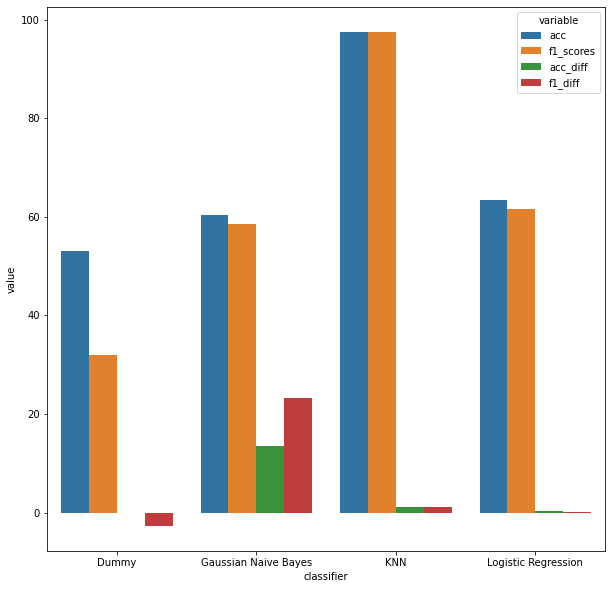

In [ ]:
data2 = pd.DataFrame()
data2['classifier'] = classifier
data2['acc'] = accs
data2['f1_scores'] = f1_scores
data2['acc_diff'] = acc_diff
data2['f1_diff'] = f1_diff
data2 = pd.melt(data2, id_vars =['classifier'], value_vars =['acc', 'f1_scores','acc_diff','f1_diff'])
plt.figure(figsize=(10,10))
sns.barplot(x='classifier', y='value', hue='variable', data=data2)
plt.show()

### *Confusion Matrices*

Στη συνέχεια παρατίθενται τα confusion matrices των ταξινομητών:

*   Nearest Neighbor (για k=1) - καλύτερος ταξινομητής

*   Gaussian Naive Bayes - χειρότερος ταξινομητής

(Εξαιρούμε τον Dummy Classifier)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    return 

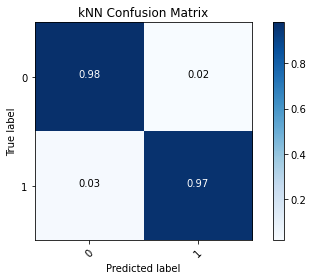

In [ ]:
predictions = kNN_estimator.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=labels.unique())
plot_confusion_matrix(cm,classes=labels.unique(),title = 'kNN Confusion Matrix',normalize=True)

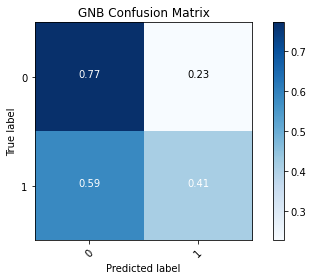

In [ ]:
predictions = gnb_estimator1.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=labels.unique())
plot_confusion_matrix(cm,classes=labels.unique(),title = 'GNB Confusion Matrix',normalize=True)

### *Συμπέρασμα*

Συνολικά για όλους τους ταξινομητές, μπορούμε να δούμε πως μετά την βελτιστοποίηση, παρουσιάζουν καλύτερη απόδοση ειδικά ως προς το accuracy. 

Συγκεκριμένα μπορούμε να δούμε πως το μεγαλύτερο accuracy και f1 score εξακολουθεί να επιστρέφεται από τον kNN (για k=1 μετά από grid search). Οι χαμηλότερες τιμές f1 και accuracy επιστρέφονται από τους Gaussian Naive Bayes και Dummy αντίστοιχα. 

Προφανώς, ούτε η κανονικοποίηση, ούτε και η μείωση της διαστατικότητας των δεδομένων, μπόρεσαν να επιλύσουν τα προβλήματα που έχουν τα μοντέλα Gaussian Naive Bayes και Logistic Regression, που σχολιάσαμε και προηγουμένως (βλέπε σχόλια σε out of the box επίδοση)

**Άρα ο ταξινομητής που θα επιλέγαμε για το συγκεκριμένο πρόβλημα είναι του κοντινότερου γείνονα**

# **Μέρος Δεύτερο**

## **Επισκόπηση Dataset**

In [ ]:
!pip install -U ray
!pip install -U ray[tune]
!pip install "ray[tune]" tune-sklearn 

In [ ]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from ray.tune.sklearn import TuneGridSearchCV
from ray.tune.sklearn import TuneSearchCV

* Το συγκεκριμένο dataset περιέχει διαφορετικά είδη ξηρών φασολιών καθώς και διάφορα χαρακτηριστικά τους.

* Στη συνέχεια της εργασίας έχει γίνει χρήση όλων των διαθέσιμων χαρακτηριστικών, ώστε να κατατάξουμε σε κάποια κλάση βρίσκεται το εκαστοτε δείγμα.

In [ ]:
dry = pd.read_csv('Dry_Bean.csv')
dry.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
print("Total number of elements :",dry.shape[0])
detect=dry.columns.tolist()
detect.pop()
print("Number of attributes :",len(detect))
print("Attributes are :",detect)

Total number of elements : 13611
Number of attributes : 16
Attributes are : ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


In [ ]:
print("Check whether we can find NaN values :",dry.isnull().values.any())

Check whether we can find NaN values : False


<ul>
<li>Όπως μπορούμε να δούμε υπάρχει ανισορροπία στο dataset αφού υπάρχουν κλάσεις που εμφανίζονται με πολύ μεγαλύτερη συχνότητα έναντι μερικών άλλων. Αυτό μπορεί στην συνέχεια να επηρεάσει την απόδοση των αλγορίθμων μας.</li>
</ul>

In [ ]:
cls = dry["Class"]
lab , counts = np.unique(cls,return_counts=True)
print('The classes of our dataset are:',lab)
for i in range(0,7):
  print("Percentage of class {:s} : {:.2f} %".format(lab[i],(counts[i]/sum(counts))*100))
labels = pd.factorize(dry['Class'])
labels = labels[0]

The classes of our dataset are: ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
Percentage of class BARBUNYA : 9.71 %
Percentage of class BOMBAY : 3.84 %
Percentage of class CALI : 11.98 %
Percentage of class DERMASON : 26.05 %
Percentage of class HOROZ : 14.17 %
Percentage of class SEKER : 14.89 %
Percentage of class SIRA : 19.37 %


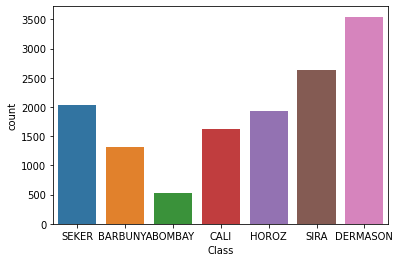

In [ ]:
with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=FutureWarning)
  sns.countplot(dry['Class'])

## **Προετοιμασία**

In [ ]:
y = labels
X = dry.drop(columns="Class")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Shape of X_train: {0}, y_train: {1}'.format(X_train.shape,y_train.shape))
print('Shape of X_test: {0}, y_test: {1}'.format(X_test.shape,y_test.shape))

Shape of X_train: (9527, 16), y_train: (9527,)
Shape of X_test: (4084, 16), y_test: (4084,)


## **Ταξινομητές**

Για την out-of-the-box επίδοση των 3 ταξινομητών, θα υπολογίζουμε κάθε φορά,το accuracy και το f1 score, ενώ επίσης θα εφαρμόσουμε και σχήμα cross-validation με kfold=5, ώστε να έχουμε μία πιο γενική εποπτεία της επίδοσης του κάθε μοντέλου και να αποφύγουμε τυχόν εξαρτήσεις από τα δεδομένα εκπαίδευσης.

### **Dummy**

In [ ]:
dummy = DummyClassifier()
print("Results of Default/Prior Dummy Classifier")
dummy_eval = train_evaluate(dummy,X_train,y_train,X_test,y_test,kfold=5)

Results of Default/Prior Dummy Classifier
Training Time: 0.000764 sec
Testing Time: 0.000183 sec
Testing Accuracy: 0.2554 % 
Testing F1 score: 0.0581 %
Cross Validation Accuracy: 0.2627 % 
Cross Validation F1 score: 0.0594 %


### **MLP**

In [ ]:
MLP = MLPClassifier()
print("Results of Default MLP Classifier")
mlp_eval = train_evaluate(MLP,X_train,y_train,X_test,y_test,kfold=5)

Results of Default MLP Classifier
Training Time: 3.074860 sec
Testing Time: 0.012723 sec
Testing Accuracy: 0.4990 % 
Testing F1 score: 0.3905 %
Cross Validation Accuracy: 0.4342 % 
Cross Validation F1 score: 0.2586 %


### **SVM**

In [ ]:
SVM = SVC()
print("Results of SVM Classifier")
svm_eval = train_evaluate(SVM,X_train,y_train,X_test,y_test,kfold=5)

Results of SVM Classifier
Training Time: 2.013843 sec
Testing Time: 1.796424 sec
Testing Accuracy: 0.6325 % 
Testing F1 score: 0.5977 %
Cross Validation Accuracy: 0.6361 % 
Cross Validation F1 score: 0.5956 %


### Σχόλια

<ul>
<li>
Χωρίς να οποιαδήποτε βελτιστοποίηση στα δεδομένα και τις υπερ - παραμέτρους των μοντέλων, παρατηρούμε ότι ο SVM εμφανίζει εμφανώς καλύτερα αποτελέσματα (χωρίς βέβαια να εξασφαλίζει υπερβολικά καλά αποτελέσματα).
</li>
<li>
Όπως ήταν αναμενόμενο, ο Dummy ταξινομητής έχει τις χειρότερες επιδόσεις. Η ακρίβεια του λαμβάνει τιμές κοντά στο 25%, που είναι και το ποσοστό με το οποίο εμφανίζεται και η κλάση με τα περισσότερα δεδομένα στο dataset μας. Από την άλλη η f1 μετρική έχει ακόμα πιο χαμηλή τιμή (κάτω από 10%).
</li>
<li>
Τέλος, όσον αφορά τον MLP ταξινομητή, παρατηρούμε ότι η απόδοση του, αν και καλύτερη από του Dummy, είναι αρκετά χαμηλή (20% χαμηλότερη από του Default SVM). Μάλιστα, ύστερα από 5-fold Cross Validation, βλέπουμε ότι οι μετρικές για την απόδοση του είναι ακόμα πιο χαμηλές. Η χρήση του Cross Validation στην περίπτωση μας, μπορεί να μας βοηθήσει να εντοπίσουμε το overfit στα δεδομένα εισόδου.
</li>
</ul>

Τα αποτελέσματα των παραπάνω ταξινομητών, με τις default τιμές τους, μπορούμε να τα δούμε και στον παρακάτω πίνακα (και στο bar plot που ακολουθεί)


In [ ]:
classifier = ['Dummy','MLP','SVM']
accs = [100*dummy_eval[0],100*mlp_eval[0],100*svm_eval[0]]
f1_scores = [100*dummy_eval[1],100*mlp_eval[1],100*svm_eval[1]]
cross_acc = [100*dummy_eval[2],100*mlp_eval[2],100*svm_eval[2]]
cross_f1 = [100*dummy_eval[3],100*mlp_eval[3],100*svm_eval[3]]
d = list(zip(classifier,accs,f1_scores,cross_acc,cross_f1))

results = pd.DataFrame(d,columns = ['Classifier','Accuracy (%)','F1 Macro (%)',
                        'Cross Validation Accuracy (%)','Cross Validation F1 (%)'],).set_index('Classifier')
results = results.style.format("{:.3f}")
results = results.set_properties(**{'width':'100px','text-align': 'center'})
results

,Accuracy (%),F1 Macro (%),Cross Validation Accuracy (%),Cross Validation F1 (%)
Classifier,,,,
Dummy,25.539,5.812,26.273,5.944
MLP,49.902,39.051,43.423,25.865
SVM,63.247,59.768,63.609,59.558


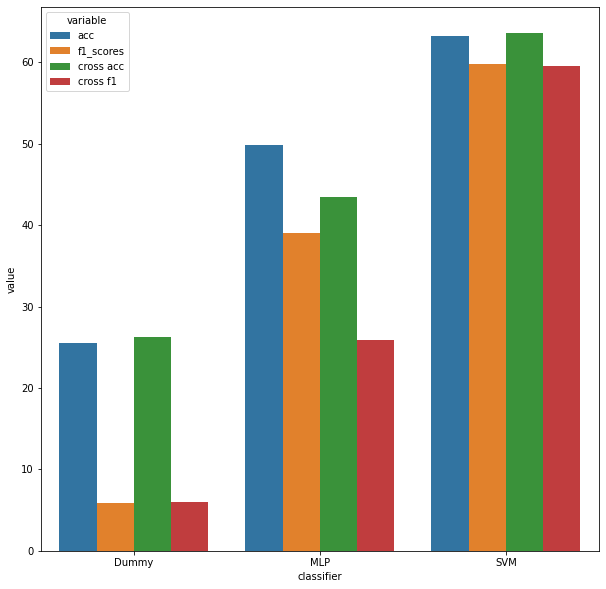

In [ ]:
data2 = pd.DataFrame()
data2['classifier'] = classifier
data2['acc'] = accs
data2['f1_scores'] = f1_scores
data2['cross acc'] = cross_acc
data2['cross f1'] = cross_f1

data2 = pd.melt(data2, id_vars =['classifier'], value_vars =['acc', 'f1_scores','cross acc','cross f1'])
plt.figure(figsize=(10,10))
sns.barplot(x='classifier', y='value', hue='variable', data=data2)
plt.show()

## **Βελτιστοποίηση**

Για την εύρεση των υπερ-παραμέτρων, που οδηγούν στην καλύτερη επίδοση των ταξινομητών, θα εξετάσουμε κυρίως την f1 μετρική, καθώς σε αντίθεση με το accuracy, λαμβάνει υπόψιν της, τις ανισορροπίες που παρατηρούμε στο σύνολο δεδομένων μας. Μάλιστα, επείδη το σύνολο μας περιλαμβάνει πολλαπλές κλάσεις, θα υπολογίζουμε κάθε φορά την macro average τιμή, η λαμβάνεται από τον μέσο όρο των f1 τιμών των επιμέρους κλάσεων. 

### **Dummy**

Για τον Dummy ταξινομητή, όπως και στο προηγούμενο ερώτημα, θα εξετάσουμε διάφορες στρατηγικές για τις προβλέψεις του. Επιπλέον, εξετάσαμε αν η χρήση του RandomOverSampler, θα βοηθήσει ή όχι την απόδοση του ταξινομητή (τελικά για την f1 μετρική, το αφαιρέσαμε).

In [ ]:
clf = DummyClassifier()
strat = ['uniform','most_frequent','stratified','constant']
con = [0,1]
pipe_dc = Pipeline(steps=[('dummy',clf)])
print("Results of Dummy Classifier - F1 Score Optimization")
estimator = GridSearchCV(pipe_dc, dict(dummy__strategy=strat,dummy__constant=con),
                         cv=10, scoring='f1_macro', n_jobs=-1)
dummy_estimator = train_evaluate(estimator,X_train,y_train,X_test,y_test)
print("Time to test best model: {:.6f} sec".format(estimator.refit_time_))

Results of Dummy Classifier - F1 Score Optimization
Training Time: 1.847038 sec
Testing Time: 0.002173 sec
Testing Accuracy: 0.1787 % 
Testing F1 score: 0.1476 %
Time to test best model: 0.001190 sec


### **MLP**

Στη συγκεκριμένη περίπτωση, όπως φαίνεται και παραπάνω χρησιμοποιήσαμε τη βιβλιοθήκη βελτιστοποίησης Ray, και μάλιστα την συνάρτηση TuneGridSearch. Με την χρήση της αντί της συνάρτησης GridSearchCV της sklearn, επιταγχύναμε αισθητά την διαδικασία εύρεσης των βέλτιστων υπερπαραμέτρων.

Οδηγηθήκαμε στο βέλτιστο μοντέλο χρησιμοποιώντας διαφορετικούς συνδυασμούς από hidden layers και αριθμού νευρώνων σ' αυτά, καθώς και διαφορετικές συναρτήσεις ενεργοποίησης.

Τα δεδομένα έχουν υποστεί κανονικοποίηση, ώστε να μην επηρεάζεται το νευρωνικό δίκτυο από τα εύρη τιμών των χαρακτηριστικών, ενώ επίσης έχουμε εφαρμόσει την μέθοδο oversampling στα δεδομένα των κλάσεων μειονότητας, για να αντιμετωπιστεί το γεγονός πως επεξεργαζόμαστε ένα μη ισορροπημένο dataset. Ακόμη έχει γίνει χρήση του αλγορίθμου PCA, προκειμένου να εξετάσουμε το βέλτιστο αριθμό διαστάσεων που απαιτούνται. 

Τέλος, πρέπει να επισημάνουμε πως έχουμε δώσει την δυνατότητα για Early Stopping κατά την εκπαίδευση των διαφόρων MLP (με validation set ίσο με 20% των δεδομένων εκπαίδευσης), προκειμένου να αποφύγουμε τον κίνδυνο του overfitting στα training δεδομένα.

In [ ]:
clf = MLPClassifier(solver='adam',tol=0.001,early_stopping=True,validation_fraction=0.2)
pca = PCA()
n_components = [5,8,10,14]
scaler = Normalizer()
ros = RandomOverSampler()
parameter_space = {
    'mlp__hidden_layer_sizes': [list((32,32,32,)),list((64,64,)),list((64,64,32,32))],
    'mlp__activation': ['tanh', 'relu'],
    'pca__n_components':n_components
}
pipe_mlp1 = Pipeline(steps=[('scaler',scaler),('pca',pca),('ros',ros),('mlp',clf)])
estimator_mlp1 = TuneGridSearchCV(pipe_mlp1, parameter_space,loggers=['tensorboard'],scoring='f1_macro')

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,module='sklearn')
    mlp_estimator = train_evaluate(estimator_mlp1,X_train,y_train,X_test,y_test)

In [ ]:
print('Testing Accuracy: {:.4f} %'.format(mlp_estimator[0]))
print('Testing F1 score: {:.4f} %'.format(mlp_estimator[1]))

Testing Accuracy: 0.8991 %
Testing F1 score: 0.9088 %


In [ ]:
print(estimator_mlp1.best_estimator_)
print('Parameters for best mlp are:', estimator_mlp1.best_params_)
time_best_mlp = estimator_mlp1.refit_time
print("Time to refit best model: {:.3f} sec".format(time_best_mlp))
print("Time to test best model: {:.6f} sec".format(mlp_estimator[3]))
print('Mean cross-validated score of the best estimator: {:.4f} %'.format(estimator_mlp1.best_score_))

Pipeline(steps=[('scaler', Normalizer()), ('pca', PCA(n_components=14)),
                ('ros', RandomOverSampler()),
                ('mlp',
                 MLPClassifier(activation='tanh', early_stopping=True,
                               hidden_layer_sizes=[64, 64], tol=0.001,
                               validation_fraction=0.2))])
Parameters for best mlp are: {'mlp__hidden_layer_sizes': [64, 64], 'mlp__activation': 'tanh', 'pca__n_components': 14}
Time to refit best model: 19.200 sec
Time to test best model: 0.022712 sec
Mean cross-validated score of the best estimator: 0.9060 %


### **SVM**

Προκειμένου να βελτιστοποιήσουμε τα αποτελέσματα αυτού του ταξινομητή δοκιμάσαμε την χρήση διαφορετικών συναρτήσεων πυρήνα καθώς και διαφορετικών τιμών gamma, ώστε να εξετάσουμε διαφορετικές εκφράσεις των συναρτήσεων αυτών. Στόχος μας με αυτόν τον τρόπο είναι να μετασχηματίσουμε τα δεδομένα, ώστε αυτά να γίνουν γραμμικά διαχωρίσιμα σε κάποια μεγαλύτερη διάσταση. 

Ακόμη εξετάσαμε την χρήση διαφορετικών τιμών της παραμέτρου C, η οποία σχετίζεται με το περιθώριο που επιτρέπει ο αλγόριθμος SVM σε λανθασμένως ταξινομημένα πρότυπα.

In [ ]:
clf = SVC()
pca = PCA()
scaler = MinMaxScaler()
param_grid = {'clf__C': [0.1, 1, 10, 100], 
              'clf__gamma': [1, 0.1, 0.0001],
              'clf__kernel': ['rbf','linear'],          
              } 
pipe_svc1 = Pipeline(steps=[('scaler',scaler),('clf',clf)])
estimator_svm1 = TuneGridSearchCV(pipe_svc1, param_grid,cv=10, scoring='f1_macro',n_jobs=-1)
svm_estimator = train_evaluate(estimator_svm1,X_train,y_train,X_test,y_test)

Training Time: 283.034355 sec
Testing Time: 0.424565 sec
Testing Accuracy: 0.9332 % 
Testing F1 score: 0.9438 %


In [ ]:
print(estimator_svm1.best_estimator_)
print('Parameters for best mlp are:', estimator_svm1.best_params_)
time_best_svm = estimator_svm1.refit_time
print("Time to refit best model: {:.3f} sec".format(time_best_svm))
print("Time to test best model: {:.6f} sec".format(svm_estimator[3]))
print('Mean cross-validated score of the best estimator: {:.4f} %'.format(estimator_svm1.best_score_))

Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', SVC(C=100, gamma=1))])
Parameters for best mlp are: {'clf__C': 100, 'clf__gamma': 1, 'clf__kernel': 'rbf'}
Time to refit best model: 0.649 sec
Time to test best model: 0.424565 sec
Mean cross-validated score of the best estimator: 0.9399 %


## **Αποτελέσματα και Συμπεράσματα**

Παρατηρούμε ότι πραγματοποιώντας προεπεξεργασία στα δεδομένα μας, καθώς και μέσα από την αναζήτηση των καλύτερων υπερ-παραμέτρων των μοντέλων, οδηγούμαστε σε πολύ καλύτερα αποτελέσματα, ιδιαίτερα ως προς την f1 μετρική.

### *Παρουσίαση αποτελεσμάτων σε πίνακα*

In [ ]:
classifier = ['Dummy','MLP','SVM']
accuracies = [100*dummy_estimator[0],100*mlp_estimator[0],100*svm_estimator[0]]
f1_scores = [100*dummy_estimator[1],100*mlp_estimator[1],100*svm_estimator[1]]
acc_diff = [100*(dummy_estimator[0]-dummy_eval[0]),100*(mlp_estimator[0]-mlp_eval[0]),
            100*(svm_estimator[0]-svm_eval[0])]
f1_diff = [100*(dummy_estimator[1]-dummy_eval[1]),100*(mlp_estimator[1]-mlp_eval[1]),
           100*(svm_estimator[1]-svm_eval[1])]
fit_time = [estimator.refit_time_,time_best_mlp,time_best_svm]
test_time = [dummy_estimator[3],mlp_estimator[3],svm_estimator[3]]

d = list(zip(classifier,accuracies,f1_scores,acc_diff,f1_diff,fit_time,test_time))

results = pd.DataFrame(d,columns = ['Classifier','Accuracy (%)','F1 Macro (%)','Accuracy Difference (%)',
                                    'F1 Difference (%)','Fitting Time (sec)',
                                    'Testing Time (sec)'],).set_index('Classifier')
results = results.style.format("{:.4f}")
results = results.set_properties(**{'width':'120px','text-align': 'center'})
results

,Accuracy (%),F1 Macro (%),Accuracy Difference (%),F1 Difference (%),Fitting Time (sec),Testing Time (sec)
Classifier,,,,,,
Dummy,17.8746,14.7612,-7.6641,8.9488,0.0012,0.0022
MLP,89.9119,90.8790,40.0098,51.8283,19.2003,0.0227
SVM,93.3154,94.3775,30.0686,34.6097,0.6487,0.4246


### *Bar Plot*

In [ ]:
classifier = ['Dummy','MLP','SVM']
accs = [100*dummy_estimator[0],100*mlp_estimator[0],100*svm_estimator[0]]
f1_scores = [100*dummy_estimator[1],100*mlp_estimator[1],100*svm_estimator[1]]
acc_diff = [100*(dummy_estimator[0]-dummy_eval[0]),100*(mlp_estimator[0]-mlp_eval[0]),
            100*(svm_estimator[0]-svm_eval[0])]
f1_diff = [100*(dummy_estimator[1]-dummy_eval[1]),100*(mlp_estimator[1]-mlp_eval[1]),
           100*(svm_estimator[1]-svm_eval[1])]
           
data2 = pd.DataFrame()
data2['classifier']=classifier
data2['acc'] = accs
data2['f1_scores'] = f1_scores
data2['acc_diff'] = acc_diff
data2['f1_diff'] = f1_diff
data3 = pd.melt(data2, id_vars =['classifier'], value_vars =['acc', 'f1_scores','acc_diff','f1_diff'])

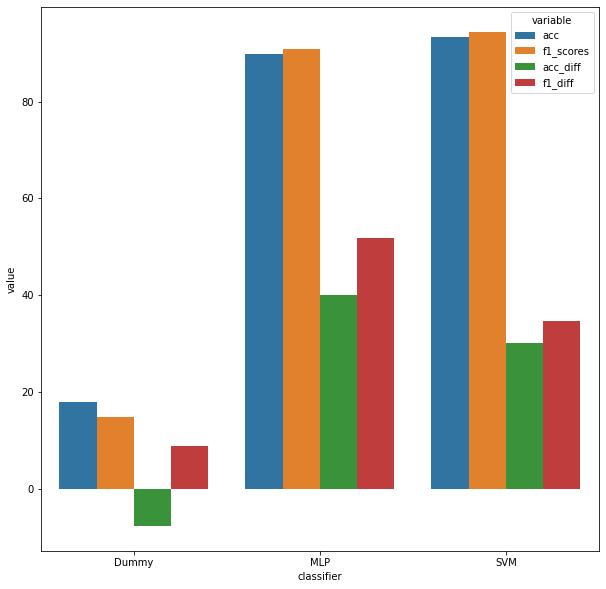

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='classifier',y='value',hue='variable',data=data3)
plt.show()

### **Confusion Matrices**

Παρακάτω δίνονται και τα confusion matrices του MLP και του SVM ταξινομητή (τον dummy, λόγω κακών αποτελεσμάτων, το παραλείπουμε):

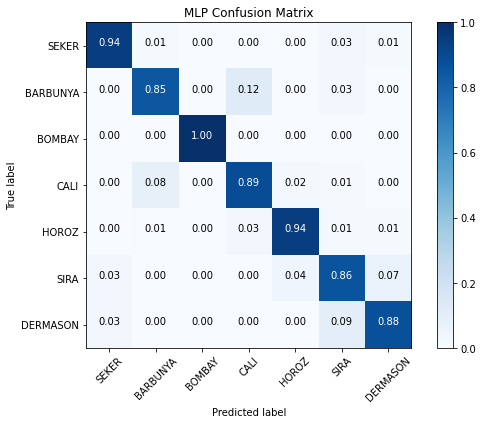

In [ ]:
predictions = estimator_mlp1.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=np.unique(labels))
plt.figure(figsize=(8,6))
plot_confusion_matrix(cm,classes=cls.unique(),title='MLP Confusion Matrix',normalize = True)

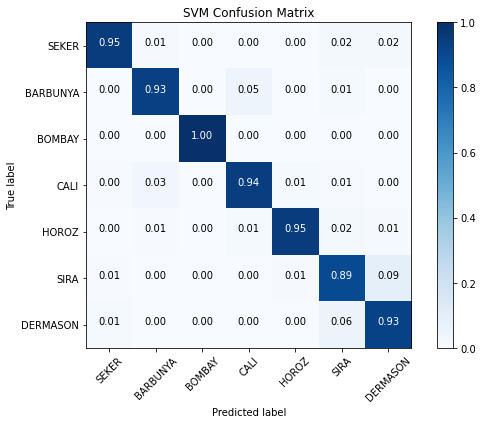

In [ ]:
predictions = estimator_svm1.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=np.unique(labels))
plt.figure(figsize=(8,6))
plot_confusion_matrix(cm,classes=cls.unique(),title='SVM Confusion Matrix',normalize = True)

### **Συμπέρασμα**

Συνολικά για όλους τους ταξινομητές μπορούμε να δούμε πως τα καλύτερα αποτελέσματα τα δίνει το SVM, ενώ όπως ήταν αναμενόμενο τα χειρότερα αποτελέσματα τα επιστρέφει ο Dummy, μίας και η απόδοση του εξαρτάται από το πλήθος των δεδομένων σε κάθε κλάση.

**Επομένως, ο καταλληλότερος ταξινομητής για το συγκεκριμένο πρόβλημα, είναι ο βελτιστοποιημένος SVM, καθώς εκτός από τις καλύτερες επιδόσεις που εμφανίζει στην πρόβλεψη των testing δεδομένων, έχει και μικρότερες υπολογιστικές απαιτήσεις (μικρότερος χρόνος εκπαίδευσης)**